## **Advertising Click Prediction Using Naive Bayes and Ensemble Learning**

In [176]:
#import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [177]:
#load dataset
df = pd.read_csv('/content/advertising_ef.csv')
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0
5,59.99,23.0,59761.56,226.74,NaN,Male,Norway,0
6,88.91,33.0,53852.85,208.36,Brandonstad,Female,Myanmar,0
7,NaN,48.0,24593.33,131.76,Port Jefferybury,Male,Australia,1
8,74.53,30.0,NaN,221.51,West Colin,Male,Grenada,0
9,69.88,20.0,55642.32,183.82,Ramirezton,Male,Ghana,0


# Data Preprocessing

## **1. Data inspection and cleaning**

##### **1.1. Identifying and handling Missing Values **

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   City                      998 non-null    object 
 5   Gender                    1009 non-null   object 
 6   Country                   996 non-null    object 
 7   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 63.2+ KB


In [179]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
City                        11
Gender                       0
Country                     13
Clicked on Ad                0
dtype: int64


In [180]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Gender', 'Country', 'Clicked on Ad'],
      dtype='object')

In [181]:
# Identify columns
num_cols = ['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Clicked on Ad']
cat_cols =['City', 'Gender', 'Country']

In [182]:
#Handle numerical data
# Impute missing values
num_imputer = SimpleImputer(strategy='median', missing_values=np.nan)
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [183]:
#Handle Categorical data
# Impute missing values
cat_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [184]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
City,0
Gender,0
Country,0
Clicked on Ad,0


##### **1.2. Checking Data Types of Columns in the Dataset **

In [185]:
# Check data types for all columns
print("\n" + "="*40)
print("Data Types of All Columns:")
print("="*40)
print(df.dtypes)


Data Types of All Columns:
Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
City                         object
Gender                       object
Country                      object
Clicked on Ad               float64
dtype: object


##### **1.3. Identifying and handling Outliers **


In [186]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,65.022785,35.952428,54980.809876,180.055312,0.501487
std,15.849866,8.724721,13309.760508,43.836717,0.500246
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.380000,29.000000,47160.530000,139.010000,0.000000
50%,68.370000,35.000000,56998.245000,183.420000,1.000000
75%,78.540000,42.000000,65186.580000,218.790000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


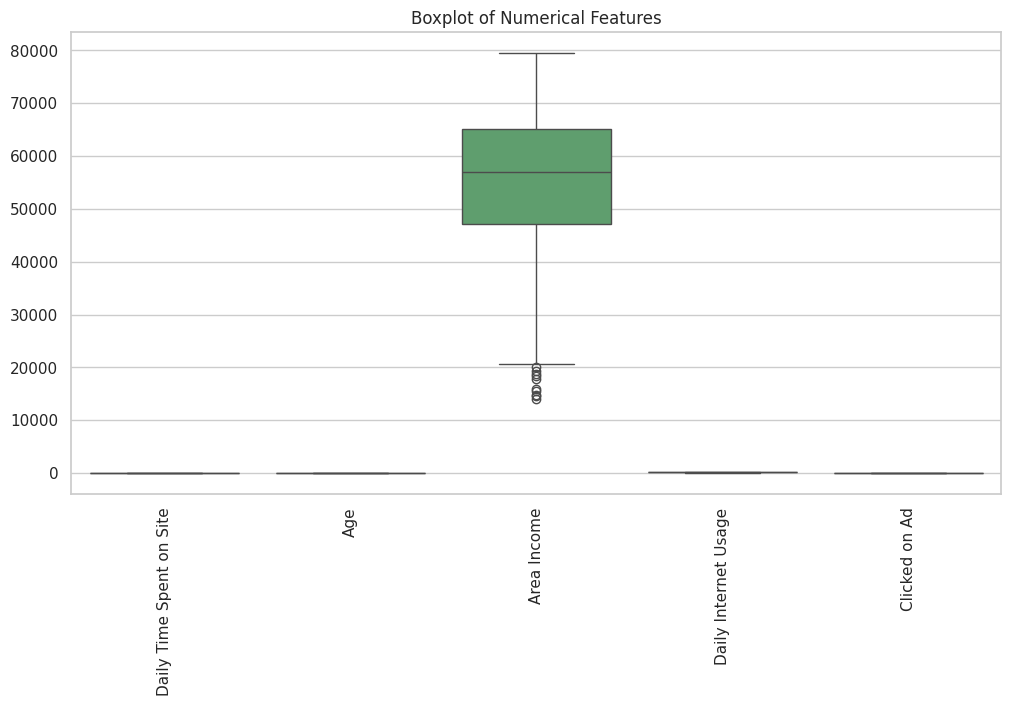

In [187]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)  # Rotate column names for better visibility
plt.title("Boxplot of Numerical Features")
plt.show()

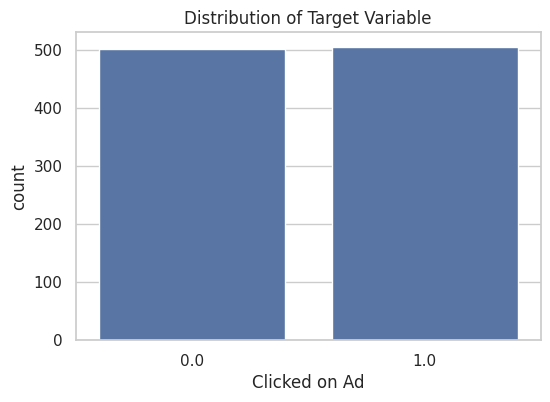

In [188]:
#Check the Distribution of Target (y)
plt.figure(figsize=(6,4))
sns.countplot(x=df['Clicked on Ad'])
plt.title("Distribution of Target Variable")
plt.show()

In [189]:
df.shape

(1009, 8)

In [190]:
cols = ['Area Income']
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [191]:
df.shape

(999, 8)

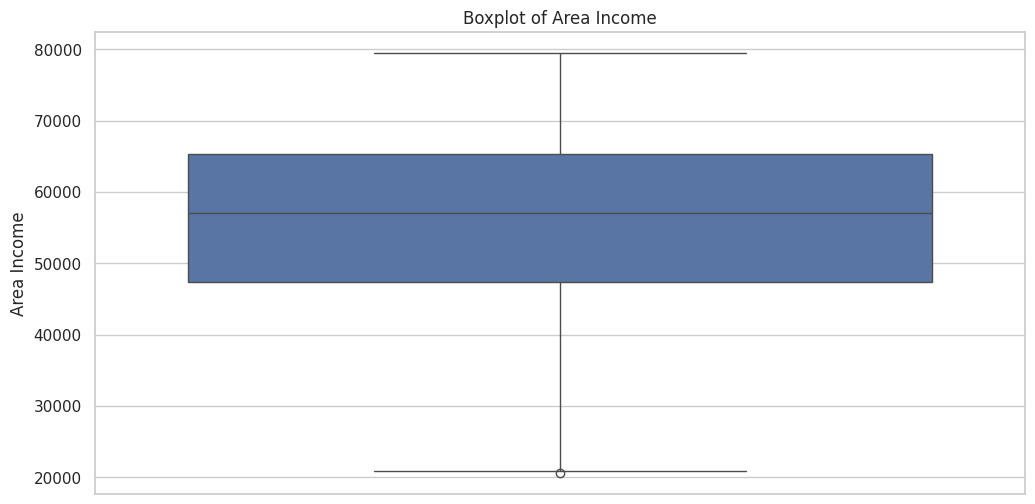

In [192]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df['Area Income'])
plt.xticks(rotation=90)  # Rotate column names for better visibility
plt.title("Boxplot of Area Income")
plt.show()

##### **1.4. Identifying and handling duplicate Values **

In [193]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Total Duplicate Rows:", duplicate_rows.sum())

Total Duplicate Rows: 0


In [194]:
print(df.shape)
print(df.isnull().sum())

(999, 8)
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
City                        0
Gender                      0
Country                     0
Clicked on Ad               0
dtype: int64


## **2. Identifying and Encoding Categorical Features**

In [195]:
# Define order for ordinal variables
ordinal_mapping = [
    ['Female', 'Male'] # Defining an order
]

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping, handle_unknown='use_encoded_value', unknown_value=-1)

# Encode the columns
df[['Gender']] = ordinal_encoder.fit_transform(df[['Gender']])

In [196]:
df.shape

(999, 8)

In [197]:
print("Unique values in Country:", df['Country'].nunique())
print("Unique values in City:", df['City'].nunique())

Unique values in Country: 237
Unique values in City: 951


In [198]:
# Apply Label encoding to nominal variables
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])
df['City'] = label_encoder.fit_transform(df['City'])

In [199]:
df.shape

(999, 8)

In [200]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
City,0
Gender,0
Country,0
Clicked on Ad,0


In [201]:
df.reset_index(drop=True, inplace=True)
df.shape

(999, 8)

## **3. Data Normalization**

In [202]:
cols_to_scale = ['Daily Time Spent on Site','Area Income','Daily Internet Usage','Age']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [203]:
# #Split data
X= df.drop('Clicked on Ad', axis=1)
y=df['Clicked on Ad']

In [204]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

📊 Gaussian Naive Bayes Model Evaluation 📊
--------------------------------------------------
✅ Accuracy: 0.9450

📌 Confusion Matrix:
[[93  4]
 [ 7 96]]

📌 Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94        97
         1.0       0.96      0.93      0.95       103

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



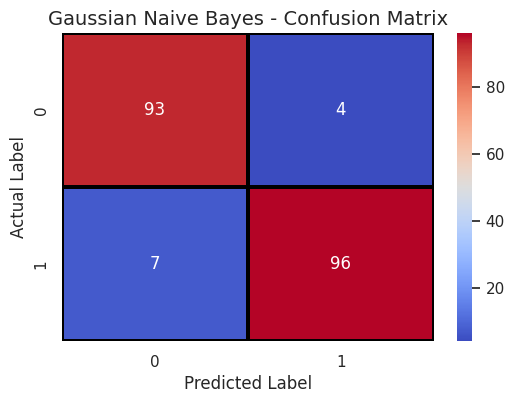

In [205]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Evaluate Gaussian Naive Bayes Model
print("📊 Gaussian Naive Bayes Model Evaluation 📊")
print("-" * 50)
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_gnb):.4f}")
print("\n📌 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred_gnb))

# Confusion Matrix Heatmap Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='coolwarm', linewidths=1.5, linecolor='black')
plt.title("Gaussian Naive Bayes - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.show()

📊 Multinomial Naive Bayes Model Evaluation 📊
--------------------------------------------------
✅ Accuracy: 0.6450

📌 Confusion Matrix:
[[64 33]
 [38 65]]

📌 Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.66      0.64        97
         1.0       0.66      0.63      0.65       103

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.64       200
weighted avg       0.65      0.65      0.65       200



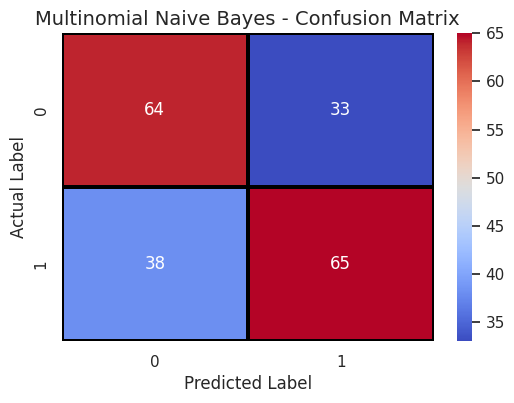

In [206]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Evaluate Multinomial Naive Bayes Model
print("📊 Multinomial Naive Bayes Model Evaluation 📊")
print("-" * 50)
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_mnb):.4f}")
print("\n📌 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb))
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred_mnb))

# Confusion Matrix Heatmap Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='coolwarm', linewidths=1.5, linecolor='black')
plt.title("Multinomial Naive Bayes - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.show()

📊 Bernoulli Naive Bayes Model Evaluation 📊
--------------------------------------------------
✅ Accuracy: 0.5250

📌 Confusion Matrix:
[[46 51]
 [44 59]]

📌 Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49        97
         1.0       0.54      0.57      0.55       103

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.53      0.52       200



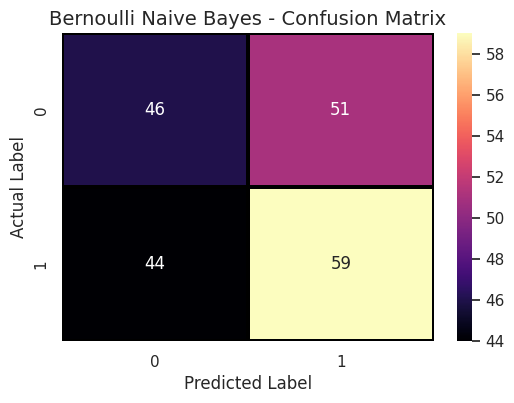

In [207]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# Evaluate Bernoulli Naive Bayes Model
print("📊 Bernoulli Naive Bayes Model Evaluation 📊")
print("-" * 50)
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_bnb):.4f}")
print("\n📌 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred_bnb))

# Confusion Matrix Heatmap Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bnb), annot=True, fmt='d', cmap='magma', linewidths=1.5, linecolor='black')
plt.title("Bernoulli Naive Bayes - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.show()

🔰 Ensemble Model Evaluation 🔰
--------------------------------------------------
✅ Accuracy: 0.9550

📌 Confusion Matrix:
[[95  2]
 [ 7 96]]

📌 Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        97
         1.0       0.98      0.93      0.96       103

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



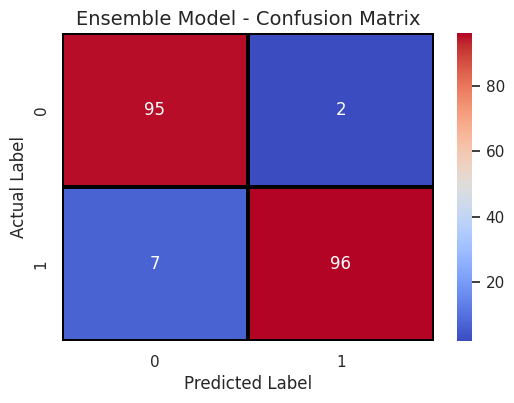

In [208]:
# Ensemble with VotingClassifier (soft voting)
ensemble_model = VotingClassifier(
    estimators=[('gnb', gnb), ('mnb', mnb), ('bnb', bnb)],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate Ensemble Model
print("🔰 Ensemble Model Evaluation 🔰")
print("-" * 50)
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")
print("\n📌 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Confusion Matrix Heatmap Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='coolwarm', linewidths=1.5, linecolor='black')
plt.title("Ensemble Model - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.show()


🔷 Average Probability Method 🔷
--------------------------------------------------
✅ Accuracy: 0.9550

📌 Confusion Matrix:
[[95  2]
 [ 7 96]]

📌 Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        97
         1.0       0.98      0.93      0.96       103

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200


🟡 Weighted Probability Method 🟡
--------------------------------------------------
✅ Accuracy: 0.9550

📌 Confusion Matrix:
[[95  2]
 [ 7 96]]

📌 Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        97
         1.0       0.98      0.93      0.96       103

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



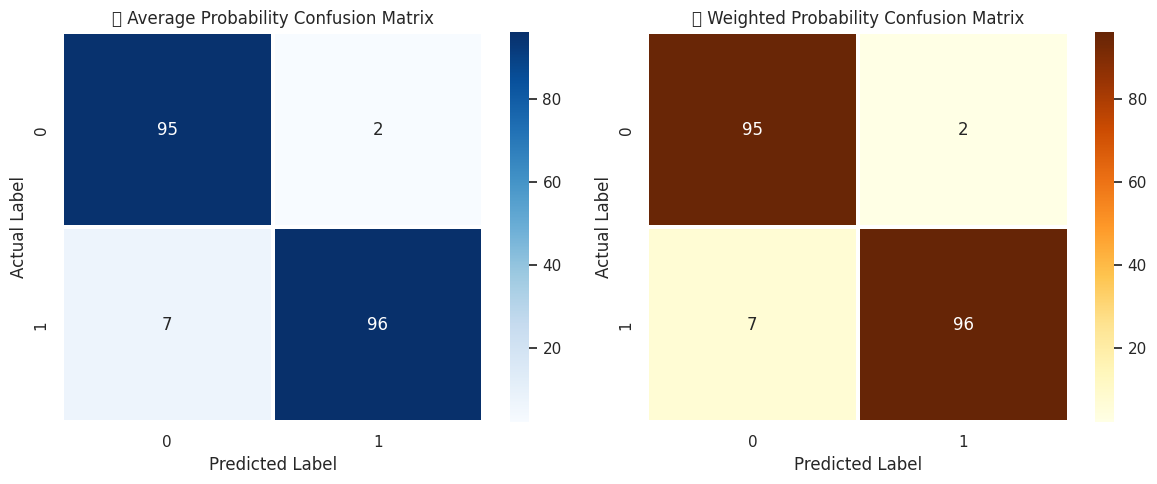

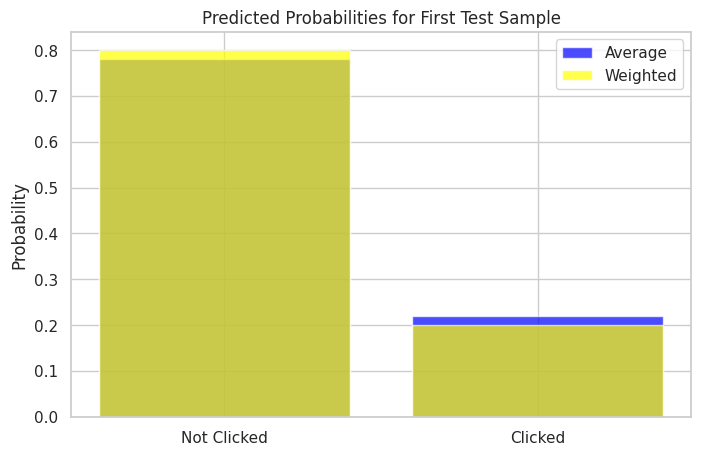

In [209]:
# Get probabilities from each model
probs_gnb = gnb.predict_proba(X_test)
probs_mnb = mnb.predict_proba(X_test)
probs_bnb = bnb.predict_proba(X_test)

# Method 1: Average probabilities
combined_probs_avg = (probs_gnb + probs_mnb + probs_bnb) / 3
y_pred_avg = np.argmax(combined_probs_avg, axis=1)

# Method 2: Weighted average (e.g., based on accuracy)
weights = [0.4, 0.3, 0.3]  # Adjust based on model performance
combined_probs_weighted = (weights[0] * probs_gnb + weights[1] * probs_mnb + weights[2] * probs_bnb)
y_pred_weighted = np.argmax(combined_probs_weighted, axis=1)

# Evaluate both methods
print("\n🔷 Average Probability Method 🔷")
print("-" * 50)
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_avg):.4f}")
print("\n📌 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_avg))
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred_avg))

print("\n🟡 Weighted Probability Method 🟡")
print("-" * 50)
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")
print("\n📌 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_weighted))
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred_weighted))

# Confusion Matrix Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_avg), annot=True, fmt='d', cmap='Blues', linewidths=1.5, ax=axes[0])
axes[0].set_title("🔷 Average Probability Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Actual Label")

sns.heatmap(confusion_matrix(y_test, y_pred_weighted), annot=True, fmt='d', cmap='YlOrBr', linewidths=1.5, ax=axes[1])
axes[1].set_title("🟡 Weighted Probability Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("Actual Label")

plt.tight_layout()
plt.show()

# Visualize predicted probabilities for first test sample
plt.figure(figsize=(8, 5))
plt.bar(['Not Clicked', 'Clicked'], combined_probs_avg[0], color='blue', label='Average', alpha=0.7)
plt.bar(['Not Clicked', 'Clicked'], combined_probs_weighted[0], color='yellow', label='Weighted', alpha=0.7)
plt.title("Predicted Probabilities for First Test Sample")
plt.ylabel("Probability")
plt.legend()
plt.show()